<a href="https://colab.research.google.com/github/ErbolTakhirov/Learning-notebooks/blob/main/projects/films_sql_merge_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import sqlite3
pd.set_option("display.max_columns", 50)

### Доступ к файлу из облачного хранилища.

In [ ]:
!wget 'https://www.dropbox.com/scl/fi/0eqkblwjqmfljk9tcr2wm/films_sql.db?rlkey=ukds5y460mvltkuoir2z7hoky&dl=1' -O films_sql.db


--2025-08-15 15:46:15--  https://www.dropbox.com/scl/fi/0eqkblwjqmfljk9tcr2wm/films_sql.db?rlkey=ukds5y460mvltkuoir2z7hoky&dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.85.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.85.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucdc752b689fbb8b62da9a685445.dl.dropboxusercontent.com/cd/0/inline/Cvcf4Q0YvxC8xj33NqwSXcwOoLNiMKIW8JI77lz0VVqp_7Zxa3Bg-1byE1YM1bdFvf6l12vJCDR03Fv6i0XcApDglTuFQs51vFF7PWDRmUdZ_sNc_gt8AyU2i4groSUzS61QXdNjGPmsdLB65QKd_Hsn/file?dl=1# [following]
--2025-08-15 15:46:15--  https://ucdc752b689fbb8b62da9a685445.dl.dropboxusercontent.com/cd/0/inline/Cvcf4Q0YvxC8xj33NqwSXcwOoLNiMKIW8JI77lz0VVqp_7Zxa3Bg-1byE1YM1bdFvf6l12vJCDR03Fv6i0XcApDglTuFQs51vFF7PWDRmUdZ_sNc_gt8AyU2i4groSUzS61QXdNjGPmsdLB65QKd_Hsn/file?dl=1
Resolving ucdc752b689fbb8b62da9a685445.dl.dropboxusercontent.com (ucdc752b689fbb8b62da9a685445.dl.dropboxusercontent.com)... 16

In [ ]:
sql_file = 'films_sql.db'

In [ ]:
conn = sqlite3.connect(sql_file) # подключение к БД

### Посмотрим все таблицы которые есть в данной БД

***"SELECT name FROM sqlite_master WHERE type='table';"***

Это классический запрос для просмотра имен таблиц которые хранятся в данной БД.

In [ ]:
import sqlite3

db_path = "/content/films_sql.db"  # путь к твоему файлу

# Проверка подключения
try:
    conn = sqlite3.connect(db_path)
    cursor = conn.cursor()
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    print("Таблицы:", cursor.fetchall())
except sqlite3.DatabaseError as e:
    print("Ошибка базы данных:", e)
finally:
    conn.close()


Ошибка базы данных: file is not a database


In [ ]:
db_path = "/content/films_sql.db"

with open(db_path, "rb") as f:
    print(f.read(50))

b''


In [ ]:
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
table_names = cursor.fetchall()
table_names

[('lincs',),
 ('lincs_small',),
 ('credits',),
 ('keywords',),
 ('movies_metadata',),
 ('ratings',),
 ('ratings_small',)]

Создадим запрос к каждой таблице и сохраним их как датасет

In [ ]:
query = "SELECT * FROM lincs"
links = pd.read_sql_query(query, conn)

In [ ]:
query = "SELECT * FROM credits"
credits = pd.read_sql_query(query, conn)

In [ ]:
query = "SELECT * FROM keywords"
keywords = pd.read_sql_query(query, conn)

In [ ]:
query = "SELECT * FROM movies_metadata"
movies_metadata = pd.read_sql_query(query, conn)

In [ ]:
query = "SELECT * FROM ratings"
ratings = pd.read_sql_query(query, conn)

In [ ]:
conn.close()

# About Dataset
## Context
These files contain metadata for all 45,000 movies listed in the Full MovieLens Dataset. The dataset consists of movies released on or before July 2017. Data points include cast, crew, plot keywords, budget, revenue, posters, release dates, languages, production companies, countries, TMDB vote counts and vote averages.

This dataset also has files containing 26 million ratings from 270,000 users for all 45,000 movies. Ratings are on a scale of 1-5 and have been obtained from the official GroupLens website.

## Content
This dataset consists of the following files:

### movies_metadata.csv:

The main Movies Metadata file. Contains information on 45,000 movies featured in the Full MovieLens dataset. Features include posters, backdrops, budget, revenue, release dates, languages, production countries and companies.

### keywords.csv:

Contains the movie plot keywords for our MovieLens movies. Available in the form of a stringified JSON Object.

### credits.csv:


Consists of Cast and Crew Information for all our movies. Available in the form of a stringified JSON Object.

### links.csv:

The file that contains the TMDB and IMDB IDs of all the movies featured in the Full MovieLens dataset.

###links_small.csv:

Contains the TMDB and IMDB IDs of a small subset of 9,000 movies of the Full Dataset.

ratings_small.csv:

The subset of 100,000 ratings from 700 users on 9,000 movies.

The Full MovieLens Dataset consisting of 26 million ratings and 750,000 tag applications from 270,000 users on all the 45,000 movies in this dataset can be accessed here

Acknowledgements
This dataset is an ensemble of data collected from TMDB and GroupLens. The Movie Details, Credits and Keywords have been collected from the TMDB Open API. This product uses the TMDb API but is not endorsed or certified by TMDb. Their API also provides access to data on many additional movies, actors and actresses, crew members, and TV shows. You can try it for yourself here.

The Movie Links and Ratings have been obtained from the Official GroupLens website. The files are a part of the dataset available here

Inspiration
This dataset was assembled as part of my second Capstone Project for Springboard's Data Science Career Track. I wanted to perform an extensive EDA on Movie Data to narrate the history and the story of Cinema and use this metadata in combination with MovieLens ratings to build various types of Recommender Systems.

Both my notebooks are available as kernels with this dataset: The Story of Film and Movie Recommender Systems

Some of the things you can do with this dataset: Predicting movie revenue and/or movie success based on a certain metric. What movies tend to get higher vote counts and vote averages on TMDB? Building Content Based and Collaborative Filtering Based Recommendation Engines.

In [ ]:
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
45838,176269,6209470,439050.0
45839,176271,2028550,111109.0
45840,176273,303758,67758.0
45841,176275,8536,227506.0


In [ ]:
movies_metadata.rename({'id': 'tmdbId'}, axis=1, inplace=True)
movies_metadata.head(2)

,adult,belongs_to_collection,budget,genres,homepage,tmdbId,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,None,Toy Story,0.0,7.7,5415.0
1,False,None,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",None,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,0.0,6.9,2413.0


In [ ]:
movies_metadata.shape

(45466, 24)

In [ ]:
keywords.rename({'id': 'tmdbId'}, axis=1, inplace=True)
keywords.head()

,tmdbId,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [ ]:
keywords.keywords[0]

"[{'id': 931, 'name': 'jealousy'}, {'id': 4290, 'name': 'toy'}, {'id': 5202, 'name': 'boy'}, {'id': 6054, 'name': 'friendship'}, {'id': 9713, 'name': 'friends'}, {'id': 9823, 'name': 'rivalry'}, {'id': 165503, 'name': 'boy next door'}, {'id': 170722, 'name': 'new toy'}, {'id': 187065, 'name': 'toy comes to life'}]"

In [ ]:
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
45838,176269,6209470,439050.0
45839,176271,2028550,111109.0
45840,176273,303758,67758.0
45841,176275,8536,227506.0


In [ ]:
ratings

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556
...,...,...,...,...
26024284,270896,58559,5.0,1257031564
26024285,270896,60069,5.0,1257032032
26024286,270896,63082,4.5,1257031764
26024287,270896,64957,4.5,1257033990


In [ ]:
credits.rename({'id': 'tmdbId'}, axis=1, inplace=True)
credits.head()

,cast,crew,tmdbId
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [ ]:
credits.cast[5]

'[{\'cast_id\': 25, \'character\': \'Lt. Vincent Hanna\', \'credit_id\': \'52fe4292c3a36847f80291f5\', \'gender\': 2, \'id\': 1158, \'name\': \'Al Pacino\', \'order\': 0, \'profile_path\': \'/ks7Ba8x9fJUlP9decBr6Dh5mThX.jpg\'}, {\'cast_id\': 26, \'character\': \'Neil McCauley\', \'credit_id\': \'52fe4292c3a36847f80291f9\', \'gender\': 2, \'id\': 380, \'name\': \'Robert De Niro\', \'order\': 1, \'profile_path\': \'/lvTSwUcvJRLAJ2FB5qFaukel516.jpg\'}, {\'cast_id\': 27, \'character\': \'Chris Shiherlis\', \'credit_id\': \'52fe4292c3a36847f80291fd\', \'gender\': 2, \'id\': 5576, \'name\': \'Val Kilmer\', \'order\': 2, \'profile_path\': \'/AlhPeiH8R4reMNGNQ9ag1FPbuW9.jpg\'}, {\'cast_id\': 28, \'character\': \'Nate\', \'credit_id\': \'52fe4292c3a36847f8029201\', \'gender\': 2, \'id\': 10127, \'name\': \'Jon Voight\', \'order\': 3, \'profile_path\': \'/c7BvyqlvqDkfkFqSBUCiR21fvTh.jpg\'}, {\'cast_id\': 29, \'character\': \'Michael Cheritto\', \'credit_id\': \'52fe4292c3a36847f8029205\', \'gend

"Это JSON в виде строки. Нужно сперва сделать из нее список. Для этого напишем функцию. Код можно нагуглить!!!

In [ ]:
import ast
def str_to_list(x:str)->list:
  return ast.literal_eval(x)

In [ ]:
str_to_list(credits.cast[5])[0]['name']

'Al Pacino'

In [ ]:
pd.DataFrame(str_to_list(credits.cast[5]))

,cast_id,character,credit_id,gender,id,name,order,profile_path
0,25,Lt. Vincent Hanna,52fe4292c3a36847f80291f5,2,1158,Al Pacino,0,/ks7Ba8x9fJUlP9decBr6Dh5mThX.jpg
1,26,Neil McCauley,52fe4292c3a36847f80291f9,2,380,Robert De Niro,1,/lvTSwUcvJRLAJ2FB5qFaukel516.jpg
2,27,Chris Shiherlis,52fe4292c3a36847f80291fd,2,5576,Val Kilmer,2,/AlhPeiH8R4reMNGNQ9ag1FPbuW9.jpg
3,28,Nate,52fe4292c3a36847f8029201,2,10127,Jon Voight,3,/c7BvyqlvqDkfkFqSBUCiR21fvTh.jpg
4,29,Michael Cheritto,52fe4292c3a36847f8029205,2,3197,Tom Sizemore,4,/soINOuacuiThRb2LyPD4tTWve7C.jpg
...,...,...,...,...,...,...,...,...
60,120,Cusamano (uncredited),56be8014c3a36817ef00540a,2,20625,Robert Miranda,60,None
61,121,Grocery Store Cop (uncredited),56be8053c3a36817f40055b3,2,1502517,Manny Perry,61,None
62,122,Waitress (uncredited),56be80a8925141734400508d,1,114625,Iva Franks Singer,62,None
63,124,Bank Guard (uncredited),56be8132925141735900536f,0,1576562,Tim Werner,63,None


# Task_1

Датасет "movies_metadata" содержит более 45 тыс фильмов. Притяните к данному датасету колонку со средним рейтингом для каждого фильма.

In [ ]:
movies_metadata.head(2)

,adult,belongs_to_collection,budget,genres,homepage,tmdbId,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,None,Toy Story,0.0,7.7,5415.0
1,False,None,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",None,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,0.0,6.9,2413.0


In [ ]:
ratings

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556
...,...,...,...,...
26024284,270896,58559,5.0,1257031564
26024285,270896,60069,5.0,1257032032
26024286,270896,63082,4.5,1257031764
26024287,270896,64957,4.5,1257033990


In [ ]:
mean_rating = ratings.groupby('movieId', as_index=False).agg({'rating':'mean'}) # группируем таблицу с рейтинком по id фильма,
mean_rating                                                                     # находим средний рейтинг для каждого фильма.
                                                                                # у нас есть средний рейтинг для каждого movieID

,movieId,rating
0,1,3.888157
1,2,3.236953
2,3,3.175550
3,4,2.875713
4,5,3.079565
...,...,...
45110,176267,4.000000
45111,176269,3.500000
45112,176271,5.000000
45113,176273,1.000000


In [ ]:
mean_rating = mean_rating.merge(links, on='movieId', how='left')      # давайте добавим к получившейся таблице со средним рейтингом
                                                                      # tmdbId с помощью merge()

In [ ]:
mean_rating

,movieId,rating,imdbId,tmdbId
0,1,3.888157,114709,862.0
1,2,3.236953,113497,8844.0
2,3,3.175550,113228,15602.0
3,4,2.875713,114885,31357.0
4,5,3.079565,113041,11862.0
...,...,...,...,...
45110,176267,4.000000,102797,30840.0
45111,176269,3.500000,6209470,439050.0
45112,176271,5.000000,2028550,111109.0
45113,176273,1.000000,303758,67758.0


обнаружили, что movies_metadata.tmdbId содержит строчные данные, проанализировали и ввыяснили, что в трех строчках содержаласть странная информация неверного формата. удалили эти три строки из таблицы, поменяли формат movies_metadata.tmdbId на целочисленный

In [ ]:
movies_metadata = movies_metadata.loc[~(movies_metadata.tmdbId.str.contains('-'))]

In [ ]:
movies_metadata.tmdbId = movies_metadata.tmdbId.astype(int)

добавили колонку со средним рейтингом в movies_metadata. с помощью merge().

для объединения взяли только два столбца mean_rating[['rating', 'tmdbId']], столбец, по которому будем сопоставлять строки - 'tmdbId', и столбец, который хотим добавить - 'rating'

In [ ]:
movies_metadata = movies_metadata.merge(mean_rating[['rating', 'tmdbId']], on='tmdbId', how='left')

In [ ]:
mean_rating

,movieId,rating,imdbId,tmdbId
0,1,3.888157,114709,862.0
1,2,3.236953,113497,8844.0
2,3,3.175550,113228,15602.0
3,4,2.875713,114885,31357.0
4,5,3.079565,113041,11862.0
...,...,...,...,...
45110,176267,4.000000,102797,30840.0
45111,176269,3.500000,6209470,439050.0
45112,176271,5.000000,2028550,111109.0
45113,176273,1.000000,303758,67758.0


# Task_1.5
Добавьте колонку с количеством отзывов на платформе для каждого фильма в таблицу movie_metadata

сгруппировали по id, посчитали количество отзывов на каждый уникальный фильм

In [ ]:
count_rating = ratings.groupby('movieId', as_index=False).size()

добавили нужный тип id к новой таблице

In [ ]:
count_rating = count_rating.merge(links, on='movieId', how='left')

добавили количество отзывов как в предыдущей задаче

In [ ]:
movies_metadata = movies_metadata.merge(count_rating[['tmdbId', 'size']], on='tmdbId', how='left')
movies_metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,tmdbId,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,rating,size
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,None,Toy Story,0.0,7.7,5415.0,3.888157,66008.0
1,False,None,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",None,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,0.0,6.9,2413.0,3.236953,26060.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",None,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,0.0,6.5,92.0,3.175550,15497.0
3,False,None,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",None,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,0.0,6.1,34.0,2.875713,2981.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",None,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,0.0,5.7,173.0,3.079565,15258.0


In [ ]:
movies_metadata

,adult,belongs_to_collection,budget,genres,homepage,tmdbId,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,rating,size
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,None,Toy Story,0.0,7.7,5415.0,3.888157,66008.0
1,False,None,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",None,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,0.0,6.9,2413.0,3.236953,26060.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",None,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,0.0,6.5,92.0,3.175550,15497.0
3,False,None,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",None,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,0.0,6.1,34.0,2.875713,2981.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",None,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,0.0,5.7,173.0,3.079565,15258.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45650,False,None,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",None,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,0.0,4.0,1.0,3.500000,1.0
45651,False,None,0,"[{'id': 18, 'name': 'Drama'}]",None,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,None,Century of Birthing,0.0,9.0,3.0,5.000000,1.0
45652,False,None,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",None,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United

# Task_2

Отберите Топ 10 фильмов по рейтингу и найдите, какие актеры там играли в первой роли!



1.   Отсортируйте movies_metadata по признаку rating, оцените результат
2.   Изучите признак size. Переименуйте его в rating_count. Визуализируйте его распределение. Изучите статистики. Среди каких фильмов лучше изкать самые высоко оцененные?
3.   Подберите порог количества отзывов на ваше усмотрение, можно попробоват разные и оценить, при каком пороге мы получим 10 достаточно известных и популярных фильмов. Отфильтруйте фильмы по этому порогу, отсортируйте по рейтингу и сохраните первые 10 в отдельный датафрейм
4. Сохраните tmdbId топ 10 фильмов в отдельный список, используя метод серии to_list()
5. Выведите из датафрейма credits те строки где tmdbId числится в созданном выше списке (вспоминаем метод isin())
6. Попробуйте вывести содержимое колонки cast для первой строки таблицы. если столкнетесь с трудностями, может помочь iloc
7. С помощью функции, созданной выше в документе str_to_list(x:str) превратите полученную строку в список словарей, который затем можно сразу превратить в датафрейм (а можно и не превращать, а сразу работать со списком словарей). Изучите его.
8. Автоматизируйте получение имени актера главной роли для всех десяти фильмов с помощью цикла, сохраните имена в список


In [ ]:
movies_metadata.sort_values('rating', ascending=False)

,adult,belongs_to_collection,budget,genres,homepage,tmdbId,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,rating,size
43942,False,None,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",None,157898,tt0025046,en,Desirable,A man meets the daughter of his lover and they...,0.350425,/gzW1W21XhoQjXKtKfNEz2I3y30U.jpg,"[{'name': 'Warner Bros.', 'id': 6194}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1934-09-08,0.0,68.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,None,Desirable,0.0,6.0,1.0,5.0,1.0
43944,False,None,0,"[{'id': 18, 'name': 'Drama'}]",None,127146,tt0025068,en,Dr. Monica,"A prominent New York doctor (Kay Francis), una...",0.365896,/wo5CyZlY260QxPNcOTr8o0v9jHU.jpg,"[{'name': 'Warner Bros.', 'id': 6194}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1934-06-23,0.0,53.0,[],Released,None,Dr. Monica,0.0,6.0,2.0,5.0,1.0
43945,False,None,0,[],None,130980,tt0052897,en,Holiday For Lovers,"Clifton Webb as a strict, conservative father ...",0.003233,/6po6v4sRLUEdT8BEEpVpiMoE9pd.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,[],1959-07-24,0.0,103.0,[],Released,None,Holiday For Lovers,0.0,0.0,0.0,5.0,1.0
45629,False,None,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",None,39562,tt0889600,en,To Be Fat Like Me,"Pretty, popular, and slim high-schooler Aly Sc...",0.767762,/w1TxeDOMS5so83bECaQECW1pV9.jpg,[],"[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2007-01-08,0.0,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,None,To Be Fat Like Me,0.0,5.0,12.0,5.0,1.0
43954,False,None,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",None,132597,tt0028158,en,Ramona,Half-Indian girl brought up in a wealthy house...,0.339674,/un9Ew300q8VMI4cyh97t3l7yp3a.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1936-09-25,0.0,84.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,In The New Perfected Technicolor,Ramona,0.0,6.0,1.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43403,False,None,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 10751...",None,37037,tt1606207,en,"Dr. Syn, Alias the Scarecrow","This Disney drama, originally broadcast as a t...",1.452854,/ml1ht09LFJO5vVLpqOspcpxQSdO.jpg,"[{'name': 'Walt Disney Productions', 'id': 3166}]","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",1963-12-06,0.0,98.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"A bold man lives a double life... by day, a co...","Dr. Syn, Alias the Scarecrow",0.0,8.0,2.0,NaN,NaN
45109,False,None,0,"[{'id': 10751, 'name': 'Family'}, {'id': 878, ...",None,84626,tt0107715,en,Nukie,Two alien brothers crash their ship in the U.S...,0.498547,/4FDzjoW9bmN6eMLQd07IPl4lSDj.jpg,"[{'name': 'Overseas FilmGroup', 'id': 888}, {'...","[{'iso_3166_1': 'ZA', 'name': 'South Africa'},...",1988-10-19,0.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Magical Space Adventure,Nukie,0.0,1.6,5.0,NaN,NaN
45272,False,None,0,[],None,425071,tt6085362,en,Decanted,The Journey of a winemaker trying to find succ...,0.06055,/32EVYbMXDtybkO0cuVZQcufJh7z.jpg,[],[],2016-11-11,0.0,82.0,[],Released,None,Decanted,0.0,0.0,0.0,NaN,NaN
45393,False,None,0,"[{'id': 18, 'name': 'Drama'}]",https://columbusthemovie.com,414453,tt5990474,en,Columbus,A Korean-born man finds himself stuck in Colum...,1.309265,/1YM144vixTdsrCzSmGUjdsRmL4D.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2017-08-04,0.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Post Production,None,Columbus,0.0,6.0,4.0,NaN,NaN


In [ ]:
movies_metadata.rename({'size': 'rating_count'}, axis=1,  inplace = True)

<Axes: xlabel='rating_count', ylabel='Density'>

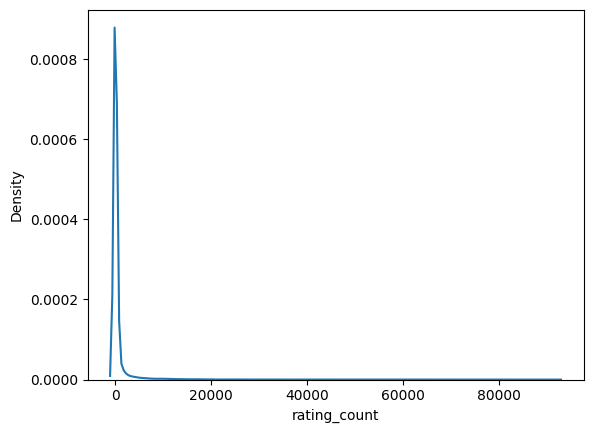

In [ ]:
sns.kdeplot(movies_metadata.rating_count)

In [ ]:
movies_metadata.rating_count.describe()

,rating_count
count,44933.000000
mean,578.867225
std,3042.932211
min,1.000000
25%,2.000000
50%,8.000000
75%,69.000000
max,91921.000000


In [ ]:
threshold = 40000 #movies_metadata.rating_count.quantile(0.9)
top_ten = movies_metadata.loc[movies_metadata.rating_count > threshold].sort_values('rating', ascending=False).head(10)
top_ten

,adult,belongs_to_collection,budget,genres,homepage,tmdbId,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,rating,rating_count
314,False,None,25000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",None,278,tt0111161,en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,51.645403,/9O7gLzmreU0nGkIB6K3BsJbzvNv.jpg,"[{'name': 'Castle Rock Entertainment', 'id': 9...","[{'iso_3166_1': 'US', 'name': 'United States o...",1994-09-23,28341469.0,142.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Fear can hold you prisoner. Hope can set you f...,The Shawshank Redemption,0.0,8.5,8358.0,4.429015,91082.0
837,False,"{'id': 230, 'name': 'The Godfather Collection'...",6000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",http://www.thegodfather.com/,238,tt0068646,en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",41.109264,/rPdtLWNsZmAtoZl9PK7S2wE3qiS.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1972-03-14,245066411.0,175.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,An offer you can't refuse.,The Godfather,0.0,8.5,6024.0,4.339811,57070.0
49,False,None,6000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",http://www.mgm.com/#/our-titles/2083/The-Usual...,629,tt0114814,en,The Usual Suspects,"Held in an L.A. interrogation room, Verbal Kin...",16.302466,/jgJoRWltoS17nD5MAQ1yK2Ztefw.jpg,"[{'name': 'Blue Parrot Productions', 'id': 361...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-07-19,23341568.0,106.0,"[{'iso_639_1': 'es', 'name': 'Español'}, {'iso...",Released,Five Criminals. One Line Up. No Coincidence.,The Usual Suspects,0.0,8.1,3334.0,4.300189,59271.0
522,False,None,22000000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",http://www.schindlerslist.com/,424,tt0108052,en,Schindler's List,The true story of how businessman Oskar Schind...,41.725123,/yPisjyLweCl1tbgwgtzBCNCBle.jpg,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",1993-11-29,321365567.0,195.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",Released,"Whoever saves one life, saves the world entire.",Schindler's List,0.0,8.3,4436.0,4.266531,67662.0
2858,False,None,63000000,"[{'id': 18, 'name': 'Drama'}]",http://www.foxmovies.com/movies/fight-club,550,tt0137523,en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,63.869599,/adw6Lq9FiC9zjYEpOqfq03ituwp.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",1999-10-15,100853753.0,139.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Mischief. Mayhem. Soap.,Fight Club,0.0,8.3,9678.0,4.230716,60024.0
1161,False,None,3000000,"[{'id': 18, 'name': 'Drama'}]",None,510,tt0073486,en,One Flew Over the Cuckoo's Nest,While serving time for insanity at a state men...,35.529554,/2Sns5oMb356JNdBHgBETjIpRYy9.jpg,"[{'name': 'United Artists', 'id': 60}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1975-11-18,108981275.0,133.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"If he's crazy, what does that make you?",One Flew Over the Cuckoo's Nest,0.0,8.3,3001.0,4.229135,40103.0
292,False,None,8000000,"[{'id': 53, 'name': 'Thriller'}, {'id': 80, 'n...",None,680,tt0110912,en,Pulp Fiction,"A burger-loving hit man, his philosophical par...",140.950236,/dM2w364MScsjFf8pfMbaWUcWrR.jpg,"[{'name': 'Miramax Films', 'id': 14}, {'name':...","[{'iso_3166_1': 'US', 'name': 'United States o...",1994-09-10,213928762.0,154.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Just because you are a character doesn't mean ...,Pulp Fiction,0.0,8.3,8670.0,4.169975,87901.0
4114,False,None,9000000,"[{'id': 9648, 'name': 'Mystery'}, {'id': 53, '...",http://www.otnemem.com/,77,tt0209144,en,Memento,Suffe

In [ ]:
top_ten_list = top_ten.tmdbId.to_list()
top_ten_list

[278, 238, 629, 424, 550, 510, 680, 77, 603, 274]

In [ ]:
credits.loc[credits.tmdbId.isin(top_ten_list)]

,cast,crew,tmdbId
49,"[{'cast_id': 19, 'character': 'Michael McManus...","[{'credit_id': '52fe4260c3a36847f8019a7d', 'de...",629
292,"[{'cast_id': 2, 'character': 'Vincent Vega', '...","[{'credit_id': '52fe4269c3a36847f801caa3', 'de...",680
314,"[{'cast_id': 3, 'character': 'Andy Dufresne', ...","[{'credit_id': '52fe4231c3a36847f800b127', 'de...",278
522,"[{'cast_id': 14, 'character': 'Oskar Schindler...","[{'credit_id': '52fe4241c3a36847f801024d', 'de...",424
586,"[{'cast_id': 1, 'character': 'Clarice Starling...","[{'credit_id': '55746f699251413f3a001b82', 'de...",274
834,"[{'cast_id': 5, 'character': 'Don Vito Corleon...","[{'credit_id': '52fe422bc3a36847f80093db', 'de...",238
1152,"[{'cast_id': 15, 'character': 'Randle Patrick ...","[{'credit_id': '52fe424cc3a36847f80134ab', 'de...",510
2458,"[{'cast_id': 34, 'character': 'Thomas ""Neo"" An...","[{'credit_id': '52fe425bc3a36847f801812f', 'de...",603
2843,"[{'cast_id': 4, 'character': 'The Narrator', '...","[{'credit_id': '55731b8192514111610027d7', 'de...",550
4099,"[{'cast_id': 4, 'character': 'Leonard', 'credi...","[{'credit_id': '52fe4214c3a36847f80024cb', 'de...",77


In [ ]:
def get_name(s):
  return pd.DataFrame(str_to_list(s)).name[0]

In [ ]:
credits.loc[credits.tmdbId.isin(top_ten_list)].cast.map(get_name).to_list()

['Stephen Baldwin',
 'John Travolta',
 'Tim Robbins',
 'Liam Neeson',
 'Jodie Foster',
 'Marlon Brando',
 'Jack Nicholson',
 'Keanu Reeves',
 'Edward Norton',
 'Guy Pearce']

# Task_3

Давайте выберем имя знаменитого актера и найдем все фильмы где он симался именно в главной роли. Какой жанр среди этих фильмов преобладает.

In [ ]:
actor = 'Keanu Reeves'

In [ ]:
temp_credits = credits.merge(movies_metadata[['tmdbId', 'genres', 'title']], on='tmdbId', how='left')
temp_credits

,cast,crew,tmdbId,genres,title
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",Toy Story
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",Jumanji
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",Grumpier Old Men
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",Waiting to Exhale
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,"[{'id': 35, 'name': 'Comedy'}]",Father of the Bride Part II
...,...,...,...,...,...
45941,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",Subdue
45942,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109,"[{'id': 18, 'name': 'Drama'}]",Century of Birthing
45943,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",Betrayal
45944,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506,[],Satan Triumphant


In [ ]:
temp_credits['main'] = temp_credits.loc[temp_credits.cast != '[]'].cast.map(get_name)

In [ ]:
temp_credits[temp_credits.main == actor]

,cast,crew,tmdbId,genres,title,main
169,"[{'cast_id': 10, 'character': 'Johnny Mnemonic...","[{'credit_id': '52fe4541c3a36847f80c3d0b', 'de...",9886,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",Johnny Mnemonic,Keanu Reeves
204,"[{'cast_id': 1, 'character': 'Paul Sutton', 'c...","[{'credit_id': '52fe450ac3a36847f80b8b79', 'de...",9560,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",A Walk in the Clouds,Keanu Reeves
360,"[{'cast_id': 1, 'character': 'Siddharta', 'cre...","[{'credit_id': '52fe430cc3a36847f803697f', 'de...",1689,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",Little Buddha,Keanu Reeves
372,"[{'cast_id': 2, 'character': 'Jack Traven', 'c...","[{'credit_id': '52fe4307c3a36847f8034f5b', 'de...",1637,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",Speed,Keanu Reeves
690,"[{'cast_id': 1, 'character': 'Jjaks Clayton', ...","[{'credit_id': '52fe45109251416c7504a705', 'de...",12656,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",Feeling Minnesota,Keanu Reeves
819,"[{'cast_id': 14, 'character': 'Eddie Kasalivic...","[{'credit_id': '52fe44ba9251416c7503ee1d', 'de...",12123,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",Chain Reaction,Keanu Reeves
1595,"[{'cast_id': 1, 'character': 'Kevin Lomax', 'c...","[{'credit_id': '53e14bf30e0a264ea600001d', 'de...",1813,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",The Devil's Advocate,Keanu Reeves
2486,"[{'cast_id': 34, 'character': 'Thomas ""Neo"" An...","[{'credit_id': '52fe425bc3a36847f801812f', 'de...",603,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",The Matrix,Keanu Reeves
3772,"[{'cast_id': 3, 'character': 'Shane Falco', 'c...","[{'credit_id': '52fe43659251416c7500ec7d', 'de...",10393,"[{'id': 35, 'name': 'Comedy'}]",The Replacements,Keanu Reeves
4064,"[{'cast_id': 15, 'character': 'Nelson', 'credi...","[{'credit_id': '52fe4322c3a36847f803cc09', 'de...",1921,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",Sweet November,Keanu Reeves


In [ ]:
str_to_list(temp_credits[temp_credits.main == actor].genres.iloc[1])

[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]

In [ ]:
def get_genres(actor):
  genres = []

  for i in range(temp_credits[temp_credits.main == actor].shape[0]):
   film = str_to_list(temp_credits[temp_credits.main == actor].genres.iloc[i])
   for d in film:
      genres.append(d['name'])


  sns.barplot(x = pd.Series(genres).value_counts(), y=pd.Series(genres).value_counts().index )

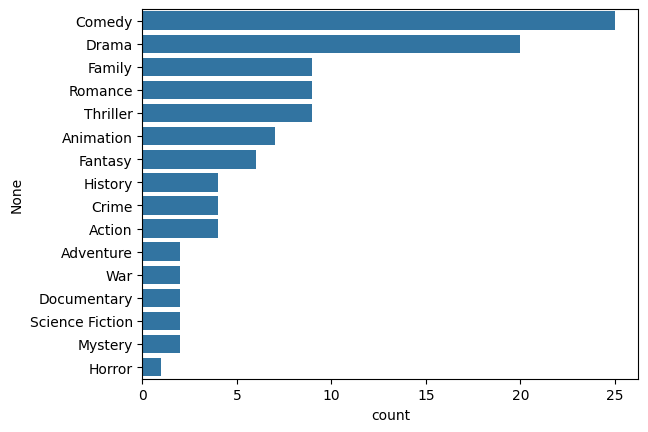

In [ ]:
get_genres('Tom Hanks')

# Task_4
Попробуем реализовать простую систему рекомендации по ключевым словам
1. Сделаем имитацию запроса от пользователя - генератор ключевых слов, который возвращает рандомные 3 или n ключевых слов из списка уникальных ключевых слов.
2. По этому набору ключевых слов ищем все фильмы с такими ключевыми словами, сортируем по рейтингу и популярности, выводим лучшие пять

In [ ]:
keywords.keywords

,keywords
0,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...
46414,"[{'id': 10703, 'name': 'tragic love'}]"
46415,"[{'id': 2679, 'name': 'artist'}, {'id': 14531,..."
46416,[]
46417,[]


In [ ]:
str_to_list(keywords.keywords[0])

[{'id': 931, 'name': 'jealousy'},
 {'id': 4290, 'name': 'toy'},
 {'id': 5202, 'name': 'boy'},
 {'id': 6054, 'name': 'friendship'},
 {'id': 9713, 'name': 'friends'},
 {'id': 9823, 'name': 'rivalry'},
 {'id': 165503, 'name': 'boy next door'},
 {'id': 170722, 'name': 'new toy'},
 {'id': 187065, 'name': 'toy comes to life'}]

In [ ]:
import ast

def str_to_list_safe(val):
    if isinstance(val, str):
        try:
            return ast.literal_eval(val)
        except (SyntaxError, ValueError):
            return []  # на случай если строка пустая или кривая
    return val  # уже список

keywords['keywords'] = keywords['keywords'].apply(str_to_list_safe)


In [ ]:
def fn(n):
    key = []
    non_empty = keywords.keywords[keywords.keywords != '[]']
    for i in range(n):
        row = non_empty.iloc[np.random.randint(0, len(non_empty))]
        if len(row) > 0:
            key.append(row[0]['name'])
    return key

In [ ]:
keyword = fn(30)

In [ ]:
keyword

['civil war',
 'human animal relationship',
 'quebec',
 'saving the world',
 'forbidden love',
 'cheating',
 'memoirs',
 'suicide',
 'lone wolf',
 'woman director',
 'political activism',
 'hunting',
 'silent film',
 'paris',
 'brandenburg',
 'saving the world',
 'erotic movie',
 'scientist',
 'biography',
 'paris',
 'competition']

In [ ]:
keywords

,tmdbId,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...
46414,439050,"[{'id': 10703, 'name': 'tragic love'}]"
46415,111109,"[{'id': 2679, 'name': 'artist'}, {'id': 14531,..."
46416,67758,[]
46417,227506,[]


In [ ]:
keywords.keywords.dtype

dtype('O')

In [ ]:
def films_keywords(key_l):
  keywords_expanded = keywords['keywords'].apply(
      lambda lst: [item['name'] for item in lst] if isinstance(lst, list) else []
  )
  mask = keywords_expanded.apply(
      lambda names: any(key in name for name in names for key in key_l)
  )
  result = keywords.loc[mask, 'tmdbId']
  return result
  # for i in result:
  #   movies_metadata.loc[movies_metadata['tmdbId'] == i, '']

In [ ]:
def sorting_films(ids):
    filtered = movies_metadata[movies_metadata['tmdbId'].isin(ids)]
    sorted_films = filtered.sort_values('rating_count', ascending=False)
    return sorted_films

In [ ]:
ids = films_keywords(keyword)
ids

,tmdbId
6,11860
13,10858
17,5
18,9273
22,9691
...,...
46396,49279
46397,44333
46398,49277
46399,49271


In [ ]:
sorting_films(ids).head(10)['original_title']

,original_title
2470,The Matrix
522,Schindler's List
1165,Raiders of the Lost Ark
1234,Back to the Future
600,Fargo
638,Mission: Impossible
4196,Shrek
1204,The Terminator
1255,Indiana Jones and the Last Crusade
4864,Le fabuleux destin d'Amélie Poulain


# Task_5
Оцените представленность жанров на платформе. Сколько фильмов приходится на каждый жанр? Какие жанры чаще смотрят(ставят оценки), какие жанры больше нравятся людям?

# Task_?

Вы можете также протестить свои идеи, поисследовать и повизуализировать данные!

In [ ]:
temp_credits = credits.merge(movies_metadata[['original_title', 'tmdbId', 'genres']], on='tmdbId', how='left')

In [ ]:
temp_credits.cast[0]

"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender': 2, 'id': 12898, 'name': 'Tim Allen', 'order': 1, 'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'}, {'cast_id': 16, 'character': 'Mr. Potato Head (voice)', 'credit_id': '52fe4284c3a36847f8024f9d', 'gender': 2, 'id': 7167, 'name': 'Don Rickles', 'order': 2, 'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'}, {'cast_id': 17, 'character': 'Slinky Dog (voice)', 'credit_id': '52fe4284c3a36847f8024fa1', 'gender': 2, 'id': 12899, 'name': 'Jim Varney', 'order': 3, 'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'}, {'cast_id': 18, 'character': 'Rex (voice)', 'credit_id': '52fe4284c3a36847f8024fa5', 'gender': 2, 'id': 12900, 'name': 'Wallace Shawn', 'order': 4, 'profile_path': '/oGE6JqPP2xH4t

In [ ]:
temp_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45946 entries, 0 to 45945
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   cast            45946 non-null  object
 1   crew            45946 non-null  object
 2   tmdbId          45946 non-null  int64 
 3   original_title  45946 non-null  object
 4   genres          45946 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.8+ MB


In [ ]:
temp_credits['main'] = temp_credits.cast.map(lambda i: str_to_list(i)[0]['name'] if i!='[]' else np.nan)

In [ ]:
temp_credits

,cast,crew,tmdbId,original_title,genres,main
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",Tom Hanks
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",Robin Williams
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",Walter Matthau
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",Whitney Houston
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]",Steve Martin
...,...,...,...,...,...,...
45941,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050,رگ خواب,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",Leila Hatami
45942,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109,Siglo ng Pagluluwal,"[{'id': 18, 'name': 'Drama'}]",Angel Aquino
45943,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758,Betrayal,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",Erika Eleniak
45944,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506,Satana likuyushchiy,[],Iwan Mosschuchin


In [ ]:
temp_credits.loc[temp_credits.main==actor]

,cast,crew,tmdbId,original_title,genres,main
169,"[{'cast_id': 10, 'character': 'Johnny Mnemonic...","[{'credit_id': '52fe4541c3a36847f80c3d0b', 'de...",9886,Johnny Mnemonic,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",Keanu Reeves
204,"[{'cast_id': 1, 'character': 'Paul Sutton', 'c...","[{'credit_id': '52fe450ac3a36847f80b8b79', 'de...",9560,A Walk in the Clouds,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",Keanu Reeves
360,"[{'cast_id': 1, 'character': 'Siddharta', 'cre...","[{'credit_id': '52fe430cc3a36847f803697f', 'de...",1689,Little Buddha,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",Keanu Reeves
372,"[{'cast_id': 2, 'character': 'Jack Traven', 'c...","[{'credit_id': '52fe4307c3a36847f8034f5b', 'de...",1637,Speed,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",Keanu Reeves
690,"[{'cast_id': 1, 'character': 'Jjaks Clayton', ...","[{'credit_id': '52fe45109251416c7504a705', 'de...",12656,Feeling Minnesota,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",Keanu Reeves
819,"[{'cast_id': 14, 'character': 'Eddie Kasalivic...","[{'credit_id': '52fe44ba9251416c7503ee1d', 'de...",12123,Chain Reaction,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",Keanu Reeves
1595,"[{'cast_id': 1, 'character': 'Kevin Lomax', 'c...","[{'credit_id': '53e14bf30e0a264ea600001d', 'de...",1813,The Devil's Advocate,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",Keanu Reeves
2486,"[{'cast_id': 34, 'character': 'Thomas ""Neo"" An...","[{'credit_id': '52fe425bc3a36847f801812f', 'de...",603,The Matrix,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",Keanu Reeves
3772,"[{'cast_id': 3, 'character': 'Shane Falco', 'c...","[{'credit_id': '52fe43659251416c7500ec7d', 'de...",10393,The Replacements,"[{'id': 35, 'name': 'Comedy'}]",Keanu Reeves
4064,"[{'cast_id': 15, 'character': 'Nelson', 'credi...","[{'credit_id': '52fe4322c3a36847f803cc09', 'de...",1921,Sweet November,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",Keanu Reeves


In [ ]:
str_to_list(temp_credits.genres[0])

[{'id': 16, 'name': 'Animation'},
 {'id': 35, 'name': 'Comedy'},
 {'id': 10751, 'name': 'Family'}]

In [ ]:
def get_genres(str_, list_):
  for d in str_to_list(str_):
    list_.append(d['name'])
  return list_

In [ ]:
genres = []
for i in range(temp_credits.loc[temp_credits.main==actor].shape[0]):
  film = temp_credits.loc[temp_credits.main==actor].genres.iloc[i]
  get_genres(film, genres)

genres

['Adventure',
 'Action',
 'Drama',
 'Science Fiction',
 'Thriller',
 'Drama',
 'Romance',
 'Drama',
 'History',
 'Action',
 'Adventure',
 'Crime',
 'Action',
 'Comedy',
 'Drama',
 'Thriller',
 'Action',
 'Drama',
 'Science Fiction',
 'Thriller',
 'Drama',
 'Horror',
 'Mystery',
 'Thriller',
 'Action',
 'Science Fiction',
 'Comedy',
 'Drama',
 'Romance',
 'Adventure',
 'Comedy',
 'Science Fiction',
 'Comedy',
 'Romance',
 'Adventure',
 'Comedy',
 'Family',
 'Fantasy',
 'Science Fiction',
 'Adventure',
 'Action',
 'Thriller',
 'Science Fiction',
 'Adventure',
 'Action',
 'Thriller',
 'Science Fiction',
 'Animation',
 'Science Fiction',
 'Animation',
 'Science Fiction',
 'Thriller',
 'Drama',
 'Fantasy',
 'Horror',
 'Romance',
 'Drama',
 'Mystery',
 'Action',
 'Crime',
 'Drama',
 'Thriller',
 'Drama',
 'Science Fiction',
 'Thriller',
 'Crime',
 'Comedy',
 'Documentary',
 'Action',
 'Drama',
 'Drama',
 'Action',
 'Adventure',
 'Fantasy',
 'Drama',
 'Action',
 'Thriller',
 'Drama',
 'Thrill

In [ ]:
pd.Series(genres).value_counts()

,count
Drama,17
Thriller,14
Action,12
Science Fiction,10
Adventure,7
Comedy,7
Crime,5
Romance,4
Documentary,3
Fantasy,3


In [ ]:
temp_credits.loc[temp_credits.main==actor].genres.iloc[0]

"[{'id': 12, 'name': 'Adventure'}, {'id': 28, 'name': 'Action'}, {'id': 18, 'name': 'Drama'}, {'id': 878, 'name': 'Science Fiction'}, {'id': 53, 'name': 'Thriller'}]"

In [ ]:
temp_credits.loc[temp_credits.cast =='[]']

,cast,crew,tmdbId,original_title,genres
137,[],"[{'credit_id': '52fe4ab0c3a368484e161d3d', 'de...",124639,Target,[]
240,[],"[{'credit_id': '52fe464ac3a36847f80f6d61', 'de...",43475,Gumby: The Movie,"[{'id': 14, 'name': 'Fantasy'}, {'id': 16, 'na..."
393,[],"[{'credit_id': '52fe4624c3a36847f80ef0a5', 'de...",42981,Frank and Ollie,"[{'id': 99, 'name': 'Documentary'}]"
438,[],"[{'credit_id': '52fe448dc3a368484e029383', 'de...",24257,The Endless Summer 2,"[{'id': 99, 'name': 'Documentary'}]"
595,[],"[{'credit_id': '52fe4aacc3a368484e16115b', 'de...",124472,A Great Day in Harlem,[]
...,...,...,...,...,...
45917,[],"[{'credit_id': '5981a15c92514151e0011b51', 'de...",455661,In a Heartbeat,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '..."
45922,[],"[{'credit_id': '52fe4684c3a36847f81034f3', 'de...",44330,Le tripot clandestin,[]
45928,[],"[{'credit_id': '52fe4a74c3a368484e1542e9', 'de...",122036,Les Transmutations imperceptibles,[]
45932,[],"[{'credit_id': '539ef1090e0a263dd00000d7', 'de...",276895,Deep Hearts,"[{'id': 99, 'name': 'Documentary'}]"
